In [18]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2010-01-01'
end = '2020-12-31'

# Tickers of assets
benchmark_index = "^BSESN"
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS VEDL.NS	WIPRO.NS ^BSESN""".split()
assets.sort()

# Downloading data
prices = yf.download(assets, start=start, end=end)
display(prices.head())
prices = prices.dropna()

[*********************100%***********************]  29 of 29 completed


Adj Close                                                   \
           AXISBANK.NS    BPCL.NS BRITANNIA.NS    CIPLA.NS   DRREDDY.NS   
Date                                                                      
2010-01-04 18110.6430% 6087.7411%  13829.2984% 31654.5044% 102270.4407%   
2010-01-05 18488.5178% 5996.0613%  13850.0198% 31087.1521% 105431.2500%   
2010-01-06 18178.1860% 5905.7884%  13724.0387% 32343.7683% 108135.4492%   
2010-01-07 18306.8848% 5791.1892%  13667.6788% 32076.5045% 106460.9863%   
2010-01-08 18546.0220% 5889.4161%  13697.9324% 31987.4084% 106922.1436%   

                                                                          ...  \
           EICHERMOT.NS    GAIL.NS HDFCBANK.NS HINDALCO.NS HINDUNILVR.NS  ...   
Date                                                                      ...   
2010-01-04   5718.8816% 8079.5937% 15575.5539% 14648.1903%   20954.5898%  ...   
2010-01-05   5528.0121% 8150.6462% 15589.2471% 15696.4096%   20887.3032%  ...   
2010-01-06   5481.8821% 8096.1380% 15599.7482% 15324.6063%   21006.0486%  ...   
2010-01-07   5405.2807% 8299.5644% 15640.3839% 15691.9312%   20962.5061%  ...   
2010-01-08   5478.0735% 8346.2845% 15660.9344% 15526.1887%   21053.5477%  ...   

               Volume                                                        \
           SIEMENS.NS SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS TATAPOWER.NS   
Date                                                                          
2010-01-04     338157       831170        952740      27906448      3172720   
2010-01-05     215852      1231990       7061550      23669317      4254349   
2010-01-06     619090      1882490       2960980      14990820      8747201   
2010-01-07    1031000       923100       3807800      22722030      5495560   
2010-01-08    1244651      3298080       2940330      16495776      3916987   

                                                                  
           TATASTEEL.NS TITAN.NS  VEDL.NS WIPRO.NS        ^BSESN  
Date                                                              
2010-01-04     58460615   490880  4639413  3409626 2820000.0000%  
2010-01-05     81889733  1282660  5319410  4979701 2700000.0000%  
2010-01-06     77150753  1318500  3891427  4575030 2140000.0000%  
2010-01-07     80144960  3218340  4389842  4582648 1800000.0000%  
2010-01-08     86063510   478240  2936406  2856839 1720000.0000%  

[5 rows x 174 columns]

In [19]:
############################################################
# Showing data
############################################################

display(prices.head())

Adj Close                                                   \
           AXISBANK.NS    BPCL.NS BRITANNIA.NS    CIPLA.NS   DRREDDY.NS   
Date                                                                      
2010-01-04 18110.6430% 6087.7411%  13829.2984% 31654.5044% 102270.4407%   
2010-01-05 18488.5178% 5996.0613%  13850.0198% 31087.1521% 105431.2500%   
2010-01-06 18178.1860% 5905.7884%  13724.0387% 32343.7683% 108135.4492%   
2010-01-07 18306.8848% 5791.1892%  13667.6788% 32076.5045% 106460.9863%   
2010-01-08 18546.0220% 5889.4161%  13697.9324% 31987.4084% 106922.1436%   

                                                                          ...  \
           EICHERMOT.NS    GAIL.NS HDFCBANK.NS HINDALCO.NS HINDUNILVR.NS  ...   
Date                                                                      ...   
2010-01-04   5718.8816% 8079.5937% 15575.5539% 14648.1903%   20954.5898%  ...   
2010-01-05   5528.0121% 8150.6462% 15589.2471% 15696.4096%   20887.3032%  ...   
2010-01-06   5481.8821% 8096.1380% 15599.7482% 15324.6063%   21006.0486%  ...   
2010-01-07   5405.2807% 8299.5644% 15640.3839% 15691.9312%   20962.5061%  ...   
2010-01-08   5478.0735% 8346.2845% 15660.9344% 15526.1887%   21053.5477%  ...   

               Volume                                                        \
           SIEMENS.NS SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS TATAPOWER.NS   
Date                                                                          
2010-01-04     338157       831170        952740      27906448      3172720   
2010-01-05     215852      1231990       7061550      23669317      4254349   
2010-01-06     619090      1882490       2960980      14990820      8747201   
2010-01-07    1031000       923100       3807800      22722030      5495560   
2010-01-08    1244651      3298080       2940330      16495776      3916987   

                                                                  
           TATASTEEL.NS TITAN.NS  VEDL.NS WIPRO.NS        ^BSESN  
Date                                                              
2010-01-04     58460615   490880  4639413  3409626 2820000.0000%  
2010-01-05     81889733  1282660  5319410  4979701 2700000.0000%  
2010-01-06     77150753  1318500  3891427  4575030 2140000.0000%  
2010-01-07     80144960  3218340  4389842  4582648 1800000.0000%  
2010-01-08     86063510   478240  2936406  2856839 1720000.0000%  

[5 rows x 174 columns]

## 2. Building the Backtest Function with Backtrader

### 2.1 Defining Backtest Function

In [20]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

### 2.2 Building Data Feeds for Backtesting

In [21]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != benchmark_index:
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds        
prices_ = prices.drop(
    columns='Adj Close').loc[:, (slice(None), benchmark_index)].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,1755873.0469%,1758283.9844%,1737838.0859%,1747344.9219%,2820000.0000%
2010-01-05,1768624.0234%,1772977.9297%,1755576.9531%,1755576.9531%,2700000.0000%
2010-01-06,1770113.0859%,1779033.0078%,1763671.0938%,1771947.0703%,2140000.0000%
2010-01-07,1761572.0703%,1773333.9844%,1756653.9062%,1770197.0703%,1800000.0000%
2010-01-08,1754028.9062%,1765811.9141%,1750896.0938%,1760386.9141%,1720000.0000%


## 3. Building Strategies with Backtrader

### 3.1 Buy and Hold SPY

In [22]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 1004:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

If you have an error related to 'warnings' modules when you try to plot, you must modify the 'locator.py' file from backtrader library following the instructions in this __[link](https://community.backtrader.com/topic/981/importerror-cannot-import-name-min_per_hour-when-trying-to-plot/8)__.

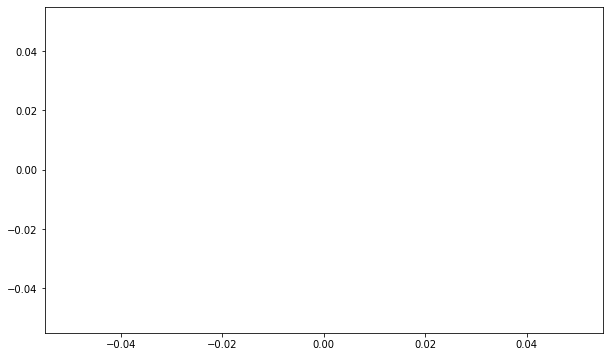

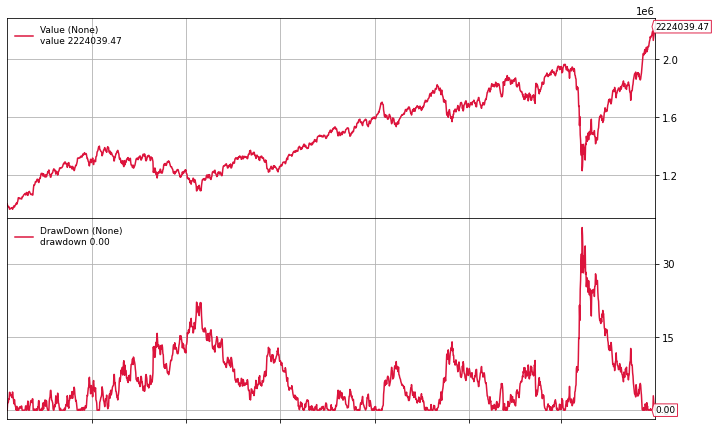

In [23]:
############################################################
# Run the backtest for the selected period
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.plot() # We need to do this to avoid errors in inline plot

start = 1004
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)

In [24]:
############################################################
# Show Buy and Hold Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 37.41%
CAGR: 7.77%
Sharpe: 0.719


### 3.2 Rebalancing Quarterly using Riskfolio-Lib

In [25]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=[benchmark_index]).dropna()
returns = data.pct_change().dropna()
display(returns.head())

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,2.0865%,-1.5060%,0.1498%,-1.7923%,3.0906%,-3.3375%,0.8794%,0.0879%,7.1560%,-0.3211%,...,0.0371%,0.4787%,3.0053%,7.7535%,-1.7424%,1.4575%,2.4221%,2.0507%,0.7370%,1.5783%
2010-01-06,-1.6785%,-1.5055%,-0.9096%,4.0422%,2.5649%,-0.8345%,-0.6688%,0.0674%,-2.3687%,0.5685%,...,0.5999%,1.0294%,1.2978%,1.5643%,0.1539%,4.6394%,-1.0861%,1.6096%,-1.0674%,-2.0220%
2010-01-07,0.7080%,-1.9405%,-0.4107%,-0.8263%,-1.5485%,-1.3974%,2.5126%,0.2605%,2.3970%,-0.2073%,...,-0.5594%,3.6884%,-1.5228%,0.3514%,-3.4182%,0.4135%,1.2071%,2.4864%,-1.1274%,-1.7741%
2010-01-08,1.3063%,1.6961%,0.2214%,-0.2778%,0.4332%,1.3467%,0.5629%,0.1314%,-1.0562%,0.4343%,...,-0.2988%,2.4933%,1.6851%,0.4988%,0.5474%,-0.0540%,-0.2077%,-0.9234%,-0.8828%,-1.5038%
2010-01-11,3.2925%,-0.2621%,-0.0242%,0.3518%,0.5067%,-0.6258%,0.8513%,-0.4023%,-0.9233%,0.0564%,...,-0.8246%,2.0444%,-0.0159%,0.5632%,0.0443%,-0.0236%,0.0077%,-0.8084%,2.4122%,-0.9955%


In [26]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby([returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0 ] 

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 1000]

In [27]:
############################################################
# Building Constraints
############################################################

asset_classes = {'Assets': """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS VEDL.NS	WIPRO.NS""".split(),
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities', 'Telecommunications Services', 'Financials', 'Financials', 'Financials', 'Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [True, True, True],
               'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,True,All Assets,,,<=,10.0000%,,,,
1,True,All Classes,Industry,,<=,20.0000%,,,,
2,True,All Classes,Industry,,>=,3.0000%,,,,


In [28]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [34]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

rms = ['MV']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in index_:
        Y = returns.iloc[i-1000:i,:] # taking last 4 years (250 trading days per year)

        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        #port.ainequality = A
        #port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
        
        # Estimate optimal portfolio:
        
        #port.solvers = ['MOSEK']
        #port.alpha = 0.05
        model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        rm = j # Risk measure used, this time will be variance
        obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        hist = True # Use historical scenarios for risk measures that depend on scenarios
        rf = 0 # Risk free rate
        l = 0 # Risk aversion factor, only useful when obj is 'Utility'

        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = index_

CPU times: user 5.25 s, sys: 4.14 s, total: 9.39 s
Wall time: 4.12 s


In [35]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

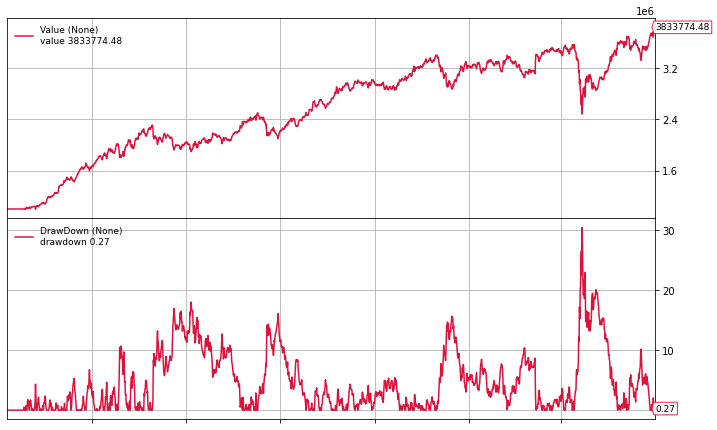

In [36]:
############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()
weights = models['MV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [37]:
############################################################
# Show Mean Variance Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 30.38%
CAGR: 13.36%
Sharpe: 0.732


array([<AxesSubplot:ylabel='2698'>], dtype=object)

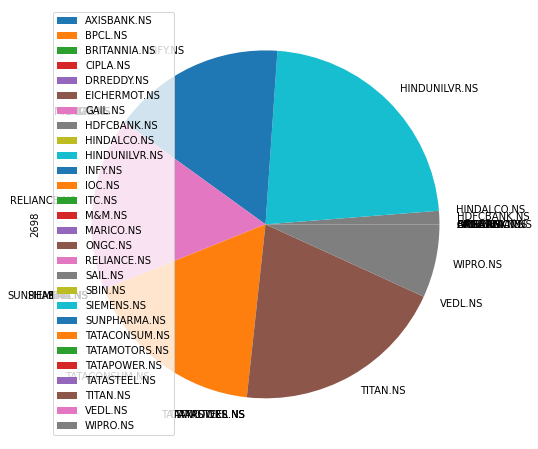

In [38]:
############################################################
# Plotting the composition of the last MV portfolio
############################################################

w = pd.DataFrame(models['MV'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))

In [39]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Consumer Discretionary,0.0000%
Consumer Staples,0.0001%
Energy,0.0000%
Financials,50.6202%
Health Care,16.1247%
Health care,0.0000%
Industrials,16.0493%
Information Technology,0.0000%
Materials,0.0000%
